In [2]:
print("i am smart")

i am smart


# Step 1: Unzip & load data

In [3]:
from zipfile import ZipFile
import pandas as pd
import time
from pathlib import Path
import os
# import tqdm

zip_path = Path("../data/raw/pharma_sales.zip")
zip_path.parent

with ZipFile(zip_path, 'r') as zip:
    print("Contents: ")
    print(zip.namelist())

    extract_path = zip_path.parent / "extracted"
    extract_path.mkdir(exist_ok=True)

    zip.extractall(path=extract_path)
    print(f"Files are getting extracted to {extract_path}....")
    time.sleep(2)
    print("DONE!!")


Contents: 
['salesdaily.csv', 'saleshourly.csv', 'salesmonthly.csv', 'salesweekly.csv']
Files are getting extracted to ..\data\raw\extracted....
DONE!!


In [4]:
### Data loading
daily_df = pd.read_csv("../data/raw/extracted/salesdaily.csv", parse_dates=['datum'])
daily_df.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
0,2014-01-02,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0,2014,1,248,Thursday
1,2014-01-03,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0,2014,1,276,Friday
2,2014-01-04,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0,2014,1,276,Saturday
3,2014-01-05,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0,2014,1,276,Sunday
4,2014-01-06,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0,2014,1,276,Monday


# Step 2: SQLite database


In [5]:
import sqlite3

# creating a database
conn = sqlite3.connect('PharmaSales_DB.db')

daily_df.to_sql(
    name='sales',          # Table name
    con=conn,              # Database connection
    if_exists='replace',   # Replace table if exists ('append' to add data)
    index=False,           # Don't write DataFrame index as a column
    dtype={'datum': 'DATE'} # Optional: enforce data types
)


2106

In [6]:
conn = sqlite3.connect('PharmaSales_DB.db')
pd.read_sql("PRAGMA table_info(sales);", conn).head()

,cid,name,type,notnull,dflt_value,pk
0,0,datum,DATE,0,None,0
1,1,M01AB,REAL,0,None,0
2,2,M01AE,REAL,0,None,0
3,3,N02BA,REAL,0,None,0
4,4,N02BE,REAL,0,None,0


### Step 2.1: Some SQL queries for fun.. later

In [7]:
# giving each column a description
names_dictionary = {
    "M01AB" : "Sales volume of anti-inflammatory and antirheumatic products, non-steroids, Acetic acid derivatives and related ",
    "M01AE" : "Sales volume of anti-inflammatory and antirheumatic products, non-steroids, Propionic acid derivatives",
    "N02BA" : "Sales volume of other analgesics and antipyretics, Salicylic acid and derivatives",
    "N02BE" : "Sales volume of other analgesics and antipyretics, Pyrazolones and Anilides",
    "N05B" : "Sales volume of psycholeptics drugs, Anxiolytic drugs",
    "N05C" : "Sales volume of psycholeptics drugs, Hypnotics and sedatives drugs",
    "R03" : "Sales volume of drugs for obstructive airway diseases",
    "R06" : "Sales volume of antihistamines for systemic use",
}


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


daily_df.describe()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour
count,2106,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000
mean,2016-11-19 12:00:00.000000256,5.033683,3.895830,3.880441,29.917095,8.853627,0.593522,5.512262,2.900198,2016.401235,6.344255,275.945869
min,2014-01-02 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,1.000000,190.000000
25%,2015-06-12 06:00:00,3.000000,2.340000,2.000000,19.000000,5.000000,0.000000,1.000000,1.000000,2015.000000,3.000000,276.000000
50%,2016-11-19 12:00:00,4.990000,3.670000,3.500000,26.900000,8.000000,0.000000,4.000000,2.000000,2016.000000,6.000000,276.000000
75%,2018-04-29 18:00:00,6.670000,5.138000,5.200000,38.300000,12.000000,1.000000,8.000000,4.000000,2018.000000,9.000000,276.000000
max,2019-10-08 00:00:00,17.340000,14.463000,16.000000,161.000000,54.833333,9.000000,45.000000,15.000000,2019.000000,12.000000,276.000000
std,NaN,2.737579,2.133337,2.384010,15.590966,5.605605,1.092988,6.428736,2.415816,1.665060,3.386954,1.970547


In [9]:
print("Total missing values: ", daily_df.isnull().sum())

Total missing values:  datum           0
M01AB           0
M01AE           0
N02BA           0
N02BE           0
N05B            0
N05C            0
R03             0
R06             0
Year            0
Month           0
Hour            0
Weekday Name    0
dtype: int64


In [10]:
df = pd.read_csv('../data/raw/extracted/salesdaily.csv', parse_dates=['datum'])

In [11]:
df.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
0,2014-01-02,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0,2014,1,248,Thursday
1,2014-01-03,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0,2014,1,276,Friday
2,2014-01-04,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0,2014,1,276,Saturday
3,2014-01-05,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0,2014,1,276,Sunday
4,2014-01-06,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0,2014,1,276,Monday


In [12]:
### Some preprocessing, picking one time series, (naming the index as Date)
ts = df.set_index('datum')['M01AE']
print(ts.describe())
ts.index.name = "Date"
ts.head()
# print(type(ts.index))

count    2106.000000
mean        3.895830
std         2.133337
min         0.000000
25%         2.340000
50%         3.670000
75%         5.138000
max        14.463000
Name: M01AE, dtype: float64


Date
2014-01-02    3.67
2014-01-03    4.00
2014-01-04    1.00
2014-01-05    3.00
2014-01-06    1.00
Name: M01AE, dtype: float64

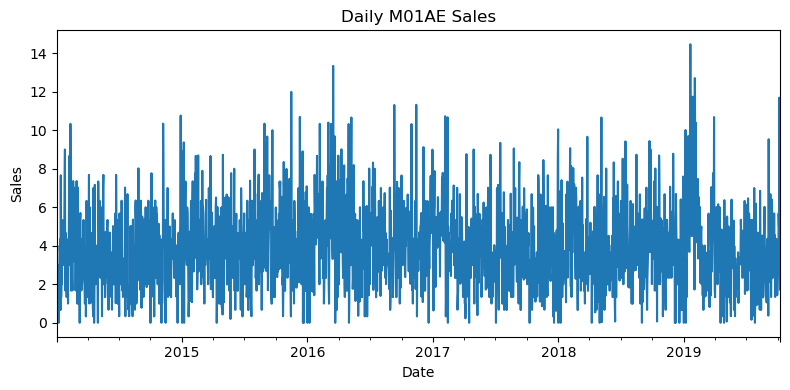

In [13]:
### visualize starting time series
plt.figure(figsize=(8, 4))
ts.plot(title='Daily M01AE Sales')
plt.ylabel('Sales')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

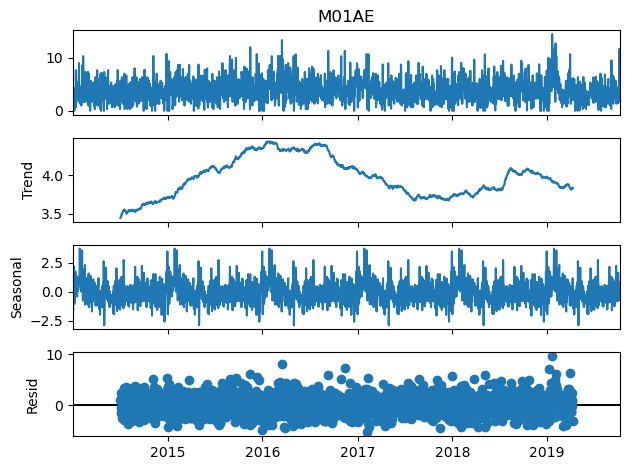

In [14]:
### Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(ts, model='additive', period=365)
result.plot()
plt.tight_layout()
plt.show()


In [15]:
prophet_ts = ts.reset_index()
prophet_ts.head()
prophet_ts.columns = ['ds', 'y']
prophet_ts.head()

,ds,y
0,2014-01-02,3.67
1,2014-01-03,4.00
2,2014-01-04,1.00
3,2014-01-05,3.00
4,2014-01-06,1.00


In [16]:
## train kai test splits, meta prophet
prophet_ts.describe()
prophet_ts\
    .head()
len_prophet_ts = len(prophet_ts)
train_size = int(len_prophet_ts * 0.9)

prophet_ts_train = prophet_ts.iloc[:train_size]
prophet_ts_test = prophet_ts.iloc[train_size:]

print(f"Train size: {len(prophet_ts_train)}")
print(f"Test size: {len(prophet_ts_test)}")



Train size: 1895
Test size: 211


In [17]:
prophet_ts_train.head()
print(prophet_ts_train.dtypes)


ds    datetime64[ns]
y            float64
dtype: object


In [18]:
print(prophet_ts_train.isna().sum())
print(np.isinf(prophet_ts_train['y']).sum())


ds    0
y     0
dtype: int64
0


In [19]:
from prophet import Prophet

model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
model.fit(prophet_ts_train)

15:01:14 - cmdstanpy - INFO - Chain [1] start processing
15:01:14 - cmdstanpy - INFO - Chain [1] done processing


In [20]:
import prophet
print(prophet.__version__)

1.1.5


In [21]:
prophet_ts_train.head()
prophet_ts_test.head()

,ds,y
1895,2019-03-12,3.373
1896,2019-03-13,4.340
1897,2019-03-14,5.670
1898,2019-03-15,1.340
1899,2019-03-16,0.837


In [22]:
ts_forecast = model.predict(prophet_ts_test)
ts_forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-03-12,3.987096,1.028478,6.226331,3.987096,3.987096,-0.268336,-0.268336,-0.268336,-0.336013,-0.336013,-0.336013,0.067677,0.067677,0.067677,0.0,0.0,0.0,3.718760
1,2019-03-13,3.987307,1.282796,6.454646,3.987307,3.987307,-0.105139,-0.105139,-0.105139,-0.193509,-0.193509,-0.193509,0.088370,0.088370,0.088370,0.0,0.0,0.0,3.882168
2,2019-03-14,3.987518,1.389730,6.543450,3.987518,3.987518,-0.180023,-0.180023,-0.180023,-0.286216,-0.286216,-0.286216,0.106192,0.106192,0.106192,0.0,0.0,0.0,3.807494
3,2019-03-15,3.987728,1.288638,6.513595,3.987728,3.987728,-0.066174,-0.066174,-0.066174,-0.186467,-0.186467,-0.186467,0.120293,0.120293,0.120293,0.0,0.0,0.0,3.921554
4,2019-03-16,3.987939,2.108425,7.326779,3.987939,3.987939,0.595827,0.595827,0.595827,0.465897,0.465897,0.465897,0.129930,0.129930,0.129930,0.0,0.0,0.0,4.583766


c:\Users\johnh\anaconda3\envs\test_env_gpu\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\johnh\anaconda3\envs\test_env_gpu\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


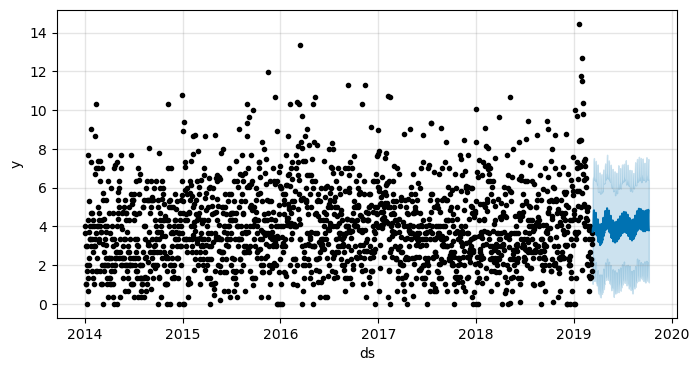

In [23]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(8, 4))
fig = model.plot(ts_forecast, ax=ax)
plt.show()

In [30]:
ts_forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-03-12,3.987096,1.028478,6.226331,3.987096,3.987096,-0.268336,-0.268336,-0.268336,-0.336013,-0.336013,-0.336013,0.067677,0.067677,0.067677,0.0,0.0,0.0,3.718760
1,2019-03-13,3.987307,1.282796,6.454646,3.987307,3.987307,-0.105139,-0.105139,-0.105139,-0.193509,-0.193509,-0.193509,0.088370,0.088370,0.088370,0.0,0.0,0.0,3.882168
2,2019-03-14,3.987518,1.389730,6.543450,3.987518,3.987518,-0.180023,-0.180023,-0.180023,-0.286216,-0.286216,-0.286216,0.106192,0.106192,0.106192,0.0,0.0,0.0,3.807494
3,2019-03-15,3.987728,1.288638,6.513595,3.987728,3.987728,-0.066174,-0.066174,-0.066174,-0.186467,-0.186467,-0.186467,0.120293,0.120293,0.120293,0.0,0.0,0.0,3.921554
4,2019-03-16,3.987939,2.108425,7.326779,3.987939,3.987939,0.595827,0.595827,0.595827,0.465897,0.465897,0.465897,0.129930,0.129930,0.129930,0.0,0.0,0.0,4.583766


c:\Users\johnh\anaconda3\envs\test_env_gpu\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\johnh\anaconda3\envs\test_env_gpu\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\johnh\anaconda3\envs\test_env_gpu\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects inste

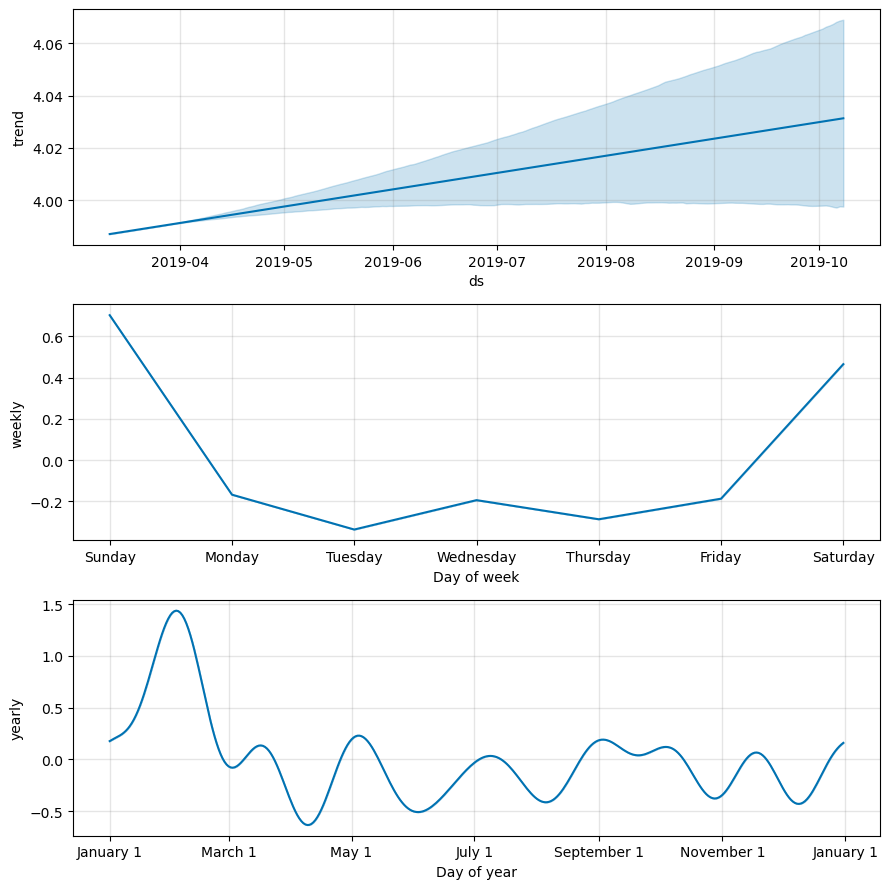

In [25]:
fig = model.plot_components(ts_forecast)
plt.tight_layout()
plt.show()

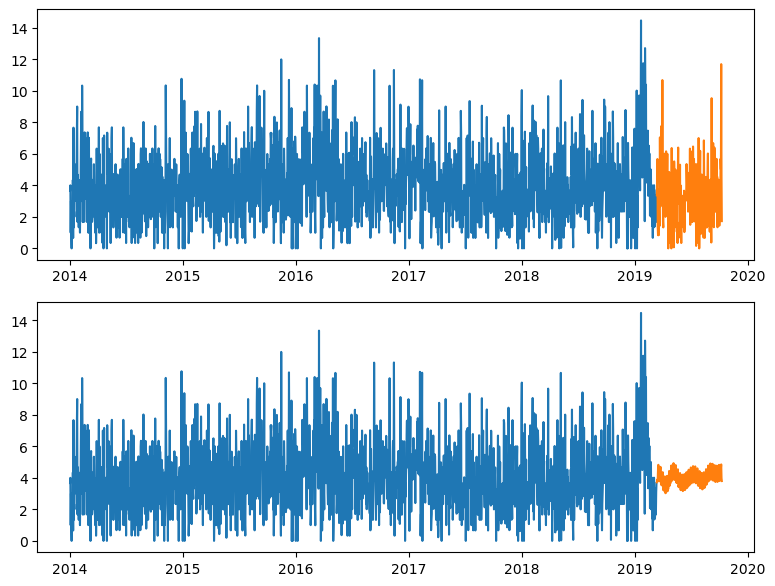

In [26]:

plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1)
# pd.concat([prophet_ts_train.ds, prophet_ts_test.ds], axis=0)
plt.plot(prophet_ts_train.ds, prophet_ts_train.y)
plt.plot(prophet_ts_test.ds, prophet_ts_test.y)
plt.subplot(2, 1, 2)
plt.plot(prophet_ts_train.ds, prophet_ts_train.y)
plt.plot(ts_forecast.ds, ts_forecast.yhat)

plt.tight_layout()
plt.show()

In [27]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, ts_forecast)

c:\Users\johnh\anaconda3\envs\test_env_gpu\Lib\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\johnh\anaconda3\envs\test_env_gpu\Lib\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



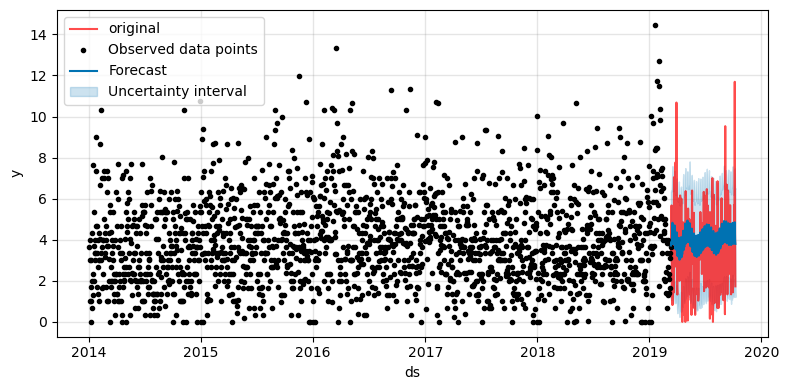

In [28]:
f, ax = plt.subplots(figsize=(8, 4))
ax.plot(prophet_ts_test.ds, prophet_ts_test.y, color='r', label="original", alpha=0.7)
fig = model.plot(ts_forecast, ax=ax)
plt.legend()
plt.tight_layout()
plt.show()

In [44]:
from sklearn.metrics import mean_absolute_error

# forecast evaluation
eval_df = prophet_ts_test.copy()
eval_df.set_index('ds', inplace=True)
eval_df['yhat'] = ts_forecast.set_index('ds')['yhat']
nan_values = np.isnan(eval_df).sum()
print(nan_values)
mae = mean_absolute_error(eval_df['y'], eval_df['yhat'])
print(mae)

y       0
yhat    0
dtype: int64
1.5405610708758777


In [55]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error


sarima_train = prophet_ts_train.copy()
sarima_train.set_index('ds', inplace=True)

sarima_test = prophet_ts_test.copy()
sarima_test.set_index('ds', inplace=True)

model_sari = SARIMAX(sarima_train['y'], order=(1,1,1), seasonal_order=(1,1,1,12)) 
results = model_sari.fit(disp=False)



c:\Users\johnh\anaconda3\envs\test_env_gpu\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\Users\johnh\anaconda3\envs\test_env_gpu\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



MAE: 1.586, MSE: 3.959


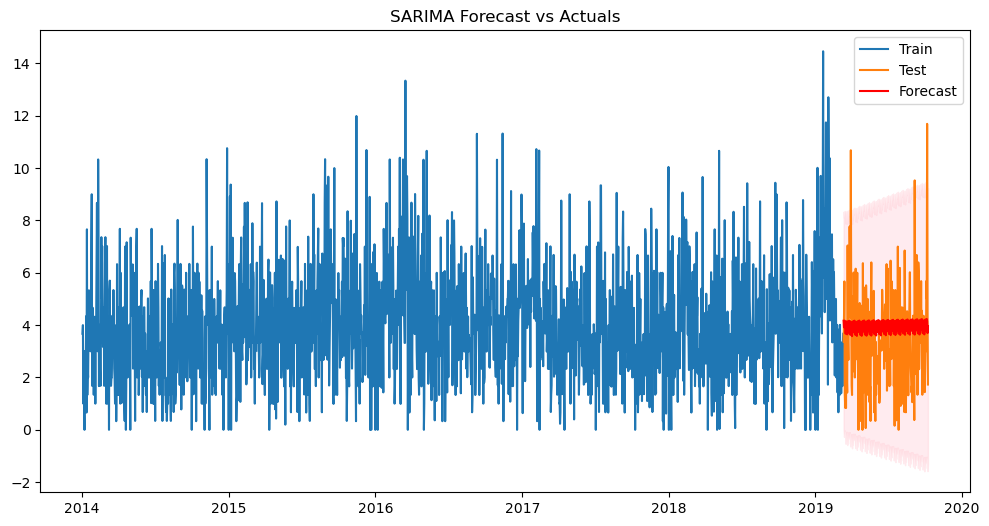

In [56]:
n_test = len(sarima_test)
forecast = results.get_forecast(steps=n_test)
pred = forecast.predicted_mean
conf_int = forecast.conf_int()


mse = mean_squared_error(sarima_test['y'], pred)
mae = mean_absolute_error(sarima_test['y'], pred)
print(f"MAE: {mae:.3f}, MSE: {mse:.3f}")

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(sarima_train.index, sarima_train['y'], label='Train')
plt.plot(sarima_test.index, sarima_test['y'], label='Test')
plt.plot(sarima_test.index, pred, label='Forecast', color='red')
plt.fill_between(sarima_test.index, conf_int.iloc[:,0], conf_int.iloc[:,1], color='pink', alpha=0.3)
plt.legend()
plt.title("SARIMA Forecast vs Actuals")
plt.show()